Iteration 1, loss = 0.46556396
Iteration 2, loss = 0.21742911
Iteration 3, loss = 0.16456687
Iteration 4, loss = 0.12978561
Iteration 5, loss = 0.10747664
Iteration 6, loss = 0.09180918
Iteration 7, loss = 0.07910142
Iteration 8, loss = 0.06925056
Iteration 9, loss = 0.06123293
Iteration 10, loss = 0.05391460
Iteration 11, loss = 0.04780388
Iteration 12, loss = 0.04275871
Iteration 13, loss = 0.03838755
Iteration 14, loss = 0.03427339
Iteration 15, loss = 0.03067490
Iteration 16, loss = 0.02680324
Iteration 17, loss = 0.02457630
Iteration 18, loss = 0.02131522
Iteration 19, loss = 0.01979118
Iteration 20, loss = 0.01757349
Iteration 21, loss = 0.01539732
Iteration 22, loss = 0.01414303
Iteration 23, loss = 0.01309168
Iteration 24, loss = 0.01163564
Iteration 25, loss = 0.01009319
Iteration 26, loss = 0.00906545
Iteration 27, loss = 0.00796887
Iteration 28, loss = 0.00729685
Iteration 29, loss = 0.00624822
Iteration 30, loss = 0.00602661
Iteration 31, loss = 0.00517360
Iteration 32, los

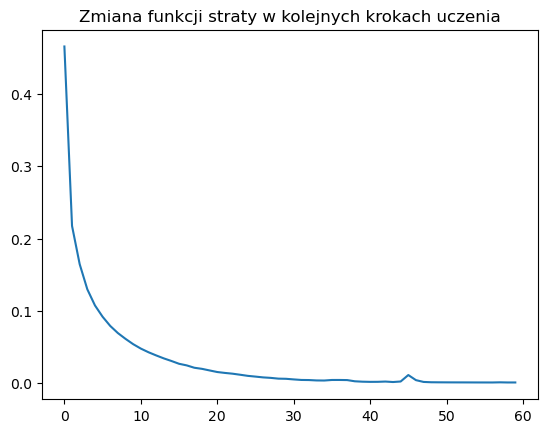

Pierwszych pięć wzorców, dla których rozpoznawanie jest błędne:


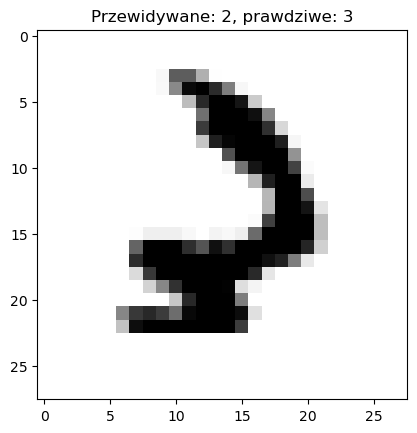

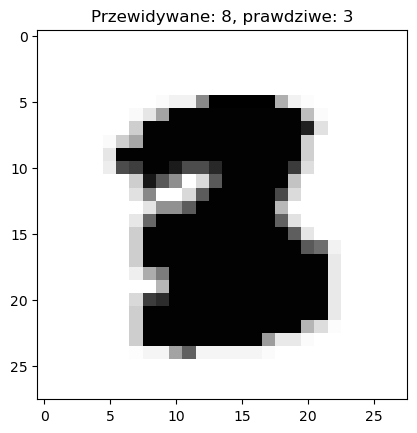

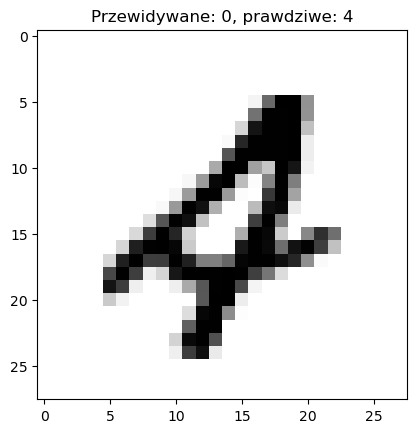

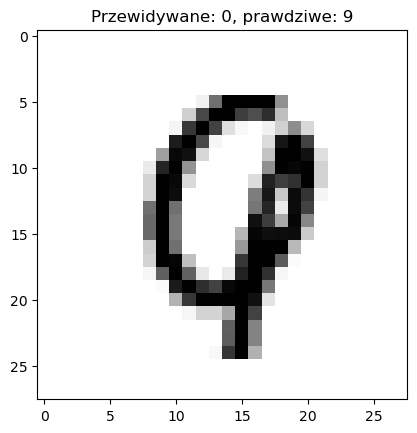

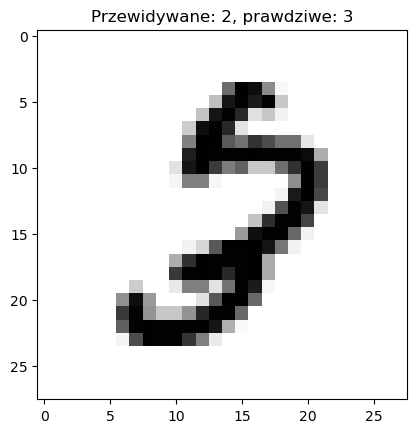

Ilość wzorców w każdej klasie w zbiorze walidującym:
{'0': 99, '1': 113, '2': 100, '3': 102, '4': 97, '5': 90, '6': 98, '7': 104, '8': 98, '9': 99}
Iteration 1, loss = 0.45697834
Iteration 2, loss = 0.21872393
Iteration 3, loss = 0.16688541
Iteration 4, loss = 0.13521272
Iteration 5, loss = 0.11301982
Iteration 6, loss = 0.09627742
Iteration 7, loss = 0.08309496
Iteration 8, loss = 0.07234941
Iteration 9, loss = 0.06472147
Iteration 10, loss = 0.05623322
Iteration 11, loss = 0.05012141
Iteration 12, loss = 0.04429696
Iteration 13, loss = 0.04047399
Iteration 14, loss = 0.03483812
Iteration 15, loss = 0.03094710
Iteration 16, loss = 0.02737663
Iteration 17, loss = 0.02508847
Iteration 18, loss = 0.02170408
Iteration 19, loss = 0.01943281
Iteration 20, loss = 0.01737446
Iteration 21, loss = 0.01564421
Iteration 22, loss = 0.01376561
Iteration 23, loss = 0.01248831
Iteration 24, loss = 0.01072894
Iteration 25, loss = 0.00952270
Iteration 26, loss = 0.00831351
Iteration 27, loss = 0.007450

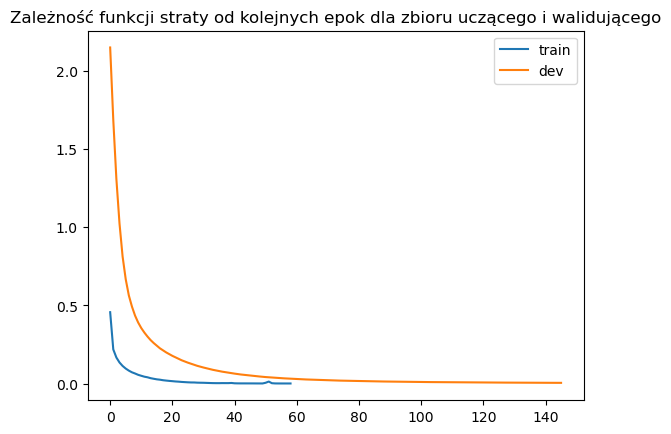

In [1]:
# Importowanie potrzebnych bibliotek:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Wczytywanie odpowiedniego zbiorów danych

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')


# Normalizacja
X = X / 255.

# Wydzielenie zbioru walidacyjnego
X_temp, X_dev, y_temp, y_dev = train_test_split(X, y, stratify=y, test_size=1000, random_state=42)

# Podział danych na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.25, random_state=42)

# Utwórz model

# 200 iteracji
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=True, 
                    warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
                    beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)


# szybsze
# mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, alpha=1e-4,
#                     solver='sgd', verbose=10, random_state=1,
#                     learning_rate_init=.1)


# mlp = MLPClassifier()


# Wytrenuj model
mlp.fit(X_train, y_train)

# Oblicz dokładność
print(f"Dokładność: {mlp.score(X_test, y_test)}")

# Oblicz i wydrukuj macierz pomyłek
cm = confusion_matrix(y_test, mlp.predict(X_test))
print("Macierz pomyłek:")
print(cm)

# Wydrukuj jak zmienia się funkcja straty w kolejnych krokach uczenia (epokach)
plt.plot(mlp.loss_curve_)
plt.title('Zmiana funkcji straty w kolejnych krokach uczenia')
plt.show()


# Wydrukuj pierwszych pięć wzorców, dla których rozpoznawanie jest błędne
predictions = mlp.predict(X_test)
y_test_array = np.array(y_test)
X_test_array = np.array(X_test)
incorrect_indices = np.nonzero(predictions != y_test_array)[0][:5]

print("Pierwszych pięć wzorców, dla których rozpoznawanie jest błędne:")
for idx in incorrect_indices:
    plt.imshow(X_test_array[idx].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Przewidywane: {predictions[idx]}, prawdziwe: {y_test_array[idx]}")
    plt.show()
 

# Wydrukuj ile jest wzorców w każdej klasie w zbiorze walidującym
unique, counts = np.unique(y_dev, return_counts=True)
print("Ilość wzorców w każdej klasie w zbiorze walidującym:")
print(dict(zip(unique, counts)))

# Wydrukuj krzywą uczenia dla zbioru uczącego i walidującego
mlp.fit(X_train, y_train)
loss_train = mlp.loss_curve_
mlp.fit(X_dev, y_dev)
loss_dev = mlp.loss_curve_
plt.plot(loss_train, label='train')
plt.plot(loss_dev, label='dev')
plt.title('Zależność funkcji straty od kolejnych epok dla zbioru uczącego i walidującego')
plt.legend()
plt.show()





Pierwszych pięć wzorców, dla których rozpoznawanie jest błędne:


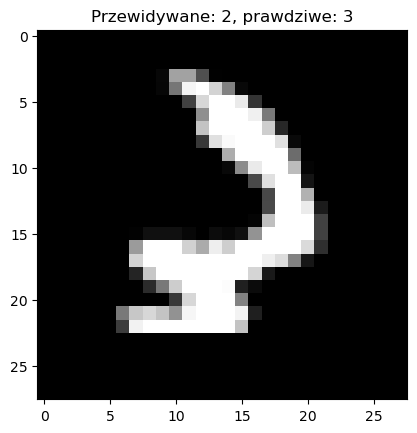

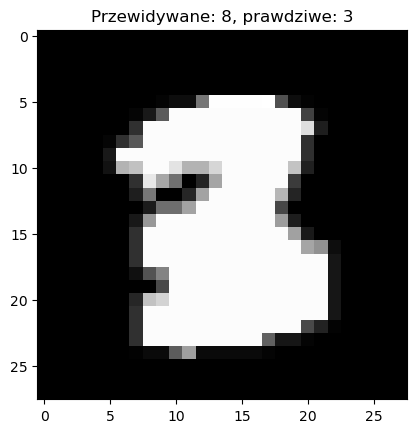

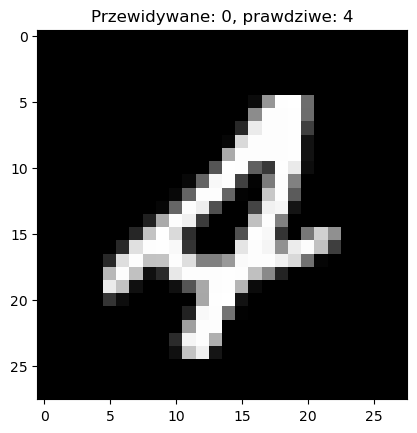

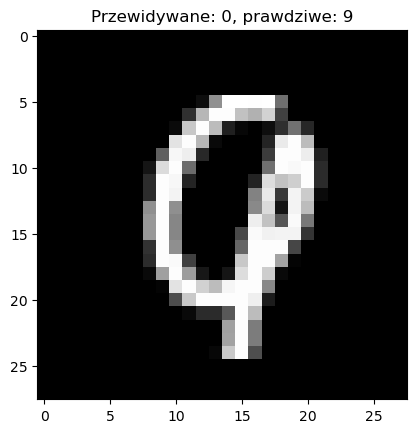

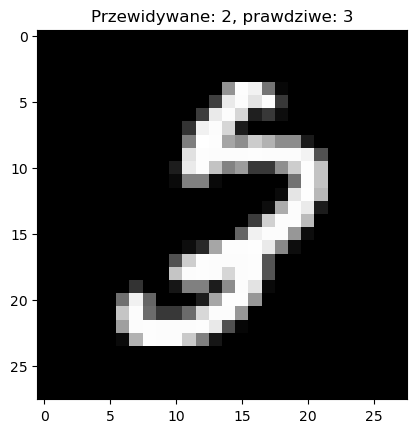